AirBnB's Effect on the Rental Market

What happened to MLS listings with the introduction of AirBnB in Toronto?
Did it affect the number of MLS listings?

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the csv
reviews_df = pd.read_csv("reviews.csv")

# Display data table for preview
reviews_df.head()

,listing_id,month,day,Year
0,1419,7,19,2015
1,1419,8,29,2015
2,1419,9,7,2015
3,1419,3,28,2016
4,1419,8,3,2017


In [2]:
reviews_df.shape

(470371, 4)

Since there is no yearly data of Airbnb listings, we looked at Airbnb reviews as basis rented airbnb listings per year. Some listings have more than 1 review per year (multiple rows). We kept only 1 to represent a rented listing in that particular year.

In [3]:
# Remove duplicates 
clean_df = reviews_df.drop_duplicates(subset=["listing_id", "Year"])
clean_df.shape

(32722, 4)

In [4]:
# Use groupby to count the number of rented listing per year
airbnb = clean_df.groupby("Year").count()["listing_id"]
airbnb

Year
2009        1
2010        9
2011       42
2012      135
2013      357
2014      833
2015     2249
2016     4623
2017     7640
2018    13234
2019     3599
Name: listing_id, dtype: int64

In [5]:
# Drop 2019 since this data is incomplete - 2019 is not done yet.
airbnb = airbnb.drop(airbnb.index[10])
airbnb

Year
2009        1
2010        9
2011       42
2012      135
2013      357
2014      833
2015     2249
2016     4623
2017     7640
2018    13234
Name: listing_id, dtype: int64

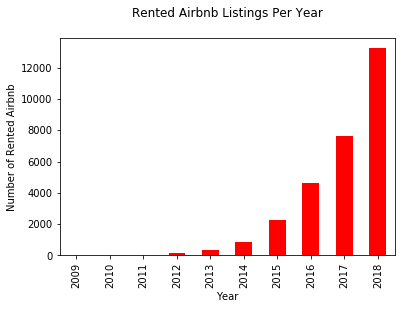

In [6]:
# Create bar graph - series method
airbnb_chart = airbnb.plot(kind="bar", title = "Rented Airbnb Listings Per Year\n", color="red")

airbnb_chart.set_xlabel("Year")
airbnb_chart.set_ylabel("Number of Rented Airbnb")

# Save Figure
plt.savefig("Rented_Airbnb_Listings_Per_Year.png")

The above chart shows that there is an increasing patronage of Airbnb in Toronto every year. 
This will be compared with Toronto MLS data

In [7]:
# Read the CSV
mls_df = pd.read_csv("MLS_Summary.csv")

# Display data table for preview
mls_df.set_index('Year', inplace=True)
mls_df

,MLS_Listed,MLS_Leased
Year,,
2012,"24,397","13,641"
2013,"30,760","16,538"
2014,"35,828","19,562"
2015,"44,980","24,878"
2016,"36,776","24,188"
2017,"35,181","23,659"
2018,"36,373","23,792"


In [8]:
mls_df.dtypes

MLS_Listed    object
MLS_Leased    object
dtype: object

Methods we tried converting string to float that all did not work...
A) mls_df = pd.read_csv("MLS_Summary.csv", dtype={"MLS_Listed":float})
B) mls_df['MLS_Listed'] = pd.to_numeric(mls_df['MLS_Listed'])
C) mls_df.MLS_Listed.astype(dtype=float)

In [9]:
# Remove , on dataset
mls_df['MLS_Listed']  = mls_df['MLS_Listed'].apply(lambda x: int(x.replace(",", "")))
mls_df['MLS_Leased']  = mls_df['MLS_Leased'].apply(lambda x: int(x.replace(",", "")))

In [10]:
mls_df.dtypes

MLS_Listed    int64
MLS_Leased    int64
dtype: object

In [11]:
airbnb = pd.DataFrame(airbnb)
airbnb = airbnb.rename(columns={"listing_id": "Airbnb_Leased"})
airbnb

,Airbnb_Leased
Year,
2009,1
2010,9
2011,42
2012,135
2013,357
2014,833
2015,2249
2016,4623
2017,7640


In [12]:
merge_table = pd.merge(mls_df, airbnb, left_index=True, right_index=True)
merge_table

,MLS_Listed,MLS_Leased,Airbnb_Leased
Year,,,
2012,24397,13641,135
2013,30760,16538,357
2014,35828,19562,833
2015,44980,24878,2249
2016,36776,24188,4623
2017,35181,23659,7640
2018,36373,23792,13234


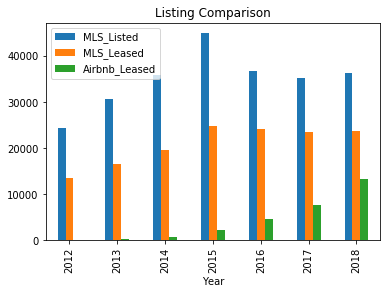

In [13]:
merge_chart = merge_table.plot(kind="bar")

merge_chart

plt.title("Listing Comparison")

# Save Figure
plt.savefig("Listing_Comparison.png")

Above chart shows that although the rented airbnb properties increased, it did not affect mls listings at all. MLS listed properties (both leased and not leased) were increasing from 2012 to 2015. It dropped on 2016 and there was little to no movement from 2016 to 2018. MLS listed and MLS leased have the same trend, unaffected by airbnb leased properties.

To further prove that there is no relationship. We used regression model below. Comparing MLS leased vs Airbnb leased, also MLS listed vs Airbnb listed, both resulted in high p-values. There is little or no evidence against the null hypothesis. 

In [14]:
from statsmodels.formula.api import ols

In [15]:
result = ols(formula="MLS_Leased ~ Airbnb_Leased", data=merge_table).fit()

In [16]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             MLS_Leased   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     3.247
Date:                Wed, 13 Mar 2019   Prob (F-statistic):              0.131
Time:                        21:52:03   Log-Likelihood:                -66.366
No. Observations:                   7   AIC:                             136.7
Df Residuals:                       5   BIC:                             136.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.852e+04   1935.289      9.570

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [17]:
result = ols(formula="MLS_Listed ~ Airbnb_Leased", data=merge_table).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             MLS_Listed   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                 -0.106
Method:                 Least Squares   F-statistic:                    0.4255
Date:                Wed, 13 Mar 2019   Prob (F-statistic):              0.543
Time:                        21:52:03   Log-Likelihood:                -70.309
No. Observations:                   7   AIC:                             144.6
Df Residuals:                       5   BIC:                             144.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.339e+04   3399.367      9.823

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [18]:
a_data = pd.read_csv("listings.csv")
a_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.646168,-79.424510,Entire home/apt,470,4,7,2017-12-04,0.16,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.641051,-79.376277,Private room,100,180,169,2013-08-27,1.48,2,0
2,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.667241,-79.415978,Private room,66,1,0,NaN,NaN,1,0
3,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.696017,-79.454683,Private room,70,1,207,2018-12-30,1.97,2,351
4,26654,"World Class downtown@ CN Tower! Jays, TIFF, ACC",113345,Adela,NaN,Waterfront Communities-The Island,43.645305,-79.389404,Entire home/apt,199,5,35,2018-10-23,0.36,7,328


Why is there no relationship? Let us explore airbnb data instead.

In [19]:
a_data = a_data[["id", "neighbourhood", "room_type", "price", "minimum_nights", "number_of_reviews", "availability_365"]]
a_data.head()

,id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,1419,Little Portugal,Entire home/apt,470,4,7,0
1,8077,Waterfront Communities-The Island,Private room,100,180,169,0
2,12604,Annex,Private room,66,1,0,0
3,23691,Briar Hill-Belgravia,Private room,70,1,207,351
4,26654,Waterfront Communities-The Island,Entire home/apt,199,5,35,328


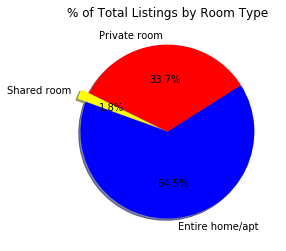

In [20]:
# % of Total listings by Room Type
per_room = a_data.groupby(["room_type"]).count()["id"]

# Create lists
room_list = ["Entire home/apt", "Private room", "Shared room" ] 
color_list = ["blue", "red", "yellow" ]

# Build Pie Chart
plt.pie(per_room, labels=room_list, colors=color_list, startangle = 160, explode=(0, 0, 0.1), shadow=True, autopct='%1.1f%%')
plt.title("% of Total Listings by Room Type")

# Save Figure
plt.savefig("Percent_of_Total_Listings_by_Room_Type.png")

MLS listings cater customers renting entire homes. Whether these clients get a bachelor's pad, 1 bedroom or 2 bedroom, they are renting it for long-term thus they want an entire home. Airbnb however has a different kind of clientele - mostly for short-term stay. Though the graph shows 64% of the listing is entire home, there is still a big chunk of private rooms at 34.2%. Since the two listings cater to different groups, then there is no relationship between them.

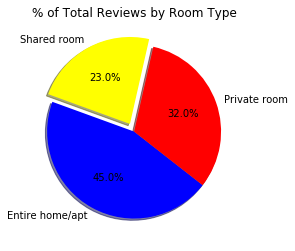

In [21]:
# % of Total Reviews by Room Type
per_review = a_data.groupby(["room_type"]).mean()["number_of_reviews"]

# Build Pie Chart
plt.pie(per_review, labels=room_list, colors=color_list, startangle = 160, explode=(0, 0, 0.1), shadow=True, autopct='%1.1f%%')
plt.title("% of Total Reviews by Room Type")

# Save Figure
plt.savefig("Percent_of_Total_Reviews_by_Room_Type.png")

To further support the statement above, let us look at the # of reviews. The number of reviews is an indicator of occupancy. Also important to note that this is an under representation since not all airbnb renters leave a review. Although only 1.8% of the inventory is shared rooms but shared rooms have 23% of total reviews. 54.8% of total reviews belong to both private rooms and shared rooms even if the total inventory of both is only 36% of the pie. 

In [22]:
# Create the bins in which Data will be held
bins = [-1, 90, 180, 270, 365]

# Create the names for the four bins
group_names = ["0-90 days", "91-180 days", "181-270 days", "271-365"]

a_data["Availability"] = pd.cut(a_data["availability_365"], bins, labels=group_names)
a_data

,id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365,Availability
0,1419,Little Portugal,Entire home/apt,470,4,7,0,0-90 days
1,8077,Waterfront Communities-The Island,Private room,100,180,169,0,0-90 days
2,12604,Annex,Private room,66,1,0,0,0-90 days
3,23691,Briar Hill-Belgravia,Private room,70,1,207,351,271-365
4,26654,Waterfront Communities-The Island,Entire home/apt,199,5,35,328,271-365
5,27423,Greenwood-Coxwell,Entire home/apt,54,120,26,0,0-90 days
6,28160,Mount Pleasant West,Entire home/apt,66,28,7,309,271-365
7,30931,Waterfront Communities-The Island,Entire home/apt,133,180,1,365,271-365
8,40456,South Parkdale,Entire home/apt,125,28,98,0,0-90 days
9,41887,Oakridge,Entire home/apt,65,2,78,40,0-90 days


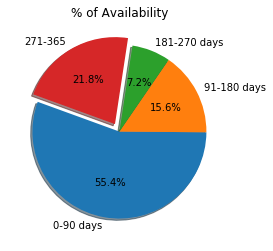

In [23]:
# % of Availability
per_availability = a_data.groupby(["Availability"]).count()["id"]

# Build Pie Chart
plt.pie(per_availability, labels=group_names, startangle = 160, explode=(0, 0, 0, 0.1), shadow=True, autopct='%1.1f%%')
plt.title("% of Availability")

# Save Figure
plt.savefig("Percent_of_Availability.png")

MLS listings are available all year round since it is intended for long term rental. The reason why Airbnb is not affecting MLS listings is because only 21.8% of Airbnb listings are available for 271 to 365 days. Majority of Airbnb listings are available for 1-90 days only. Airbnb listing is not always available probably because Airbnb property owners are also using that property. In conclusion, Airbnb and MLS listings are different types of rental and are serving different clients, thus, one is not affecting the other.